In [93]:
import pandas as pd
import numpy as np

links_table = pd.read_csv('links_table.csv', sep=';')



res = np.array([])
res = np.append(res, links_table.loc[links_table.company_name == word]['id-child'].values)
l = len(res)
i = 0

while i<l:
    if(res[i] in links_table['id-company'].values):
        res = np.append(res, links_table.loc[links_table['id-company'] == res[i]]['id-child'].values)
        l = len(res)
        res[i] = -1
    i += 1

res = list(set(res))
res.remove(-1)
res = np.array(res).astype(int)

tables = np.array([])
returnable_df = pd.DataFrame()
for i in res:
    path = "../tables/" + str(i) + '.csv'
    tmp = pd.read_csv(path, sep=';')
    returnable_df = returnable_df.append(tmp)
returnable_df.to_csv('push_back-x.csv')



In [94]:
returnable_df['Import']

0     0
1     1
2     1
3     1
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    1
12    0
13    0
14    0
0     0
1     1
2     1
3     1
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    1
12    0
13    0
14    0
Name: Import, dtype: int64

In [96]:
imp = 0
for i in range(returnable_df.shape[0]):
    imp += returnable_df.iloc[i]['Import'] * returnable_df.iloc[i]['Доля в проекте']
imp = imp / returnable_df['Доля в проекте'].sum()

In [104]:
new_df = pd.DataFrame({'Общий бюджет' : [returnable_df['Бюджет'].sum()], 'Коэффициент импортозависимости' : [imp]})


In [105]:
new_df

,Общий бюджет,Коэффициент импортозависимости
0,7800,0.1875


In [106]:
returnable_df['Наименование компонента']

,Наименование компонента,Бюджет,Платформа,Вендор,Import,Доля в проекте,Статус
0,.Net ПТК ЭЖ,100,.Net (коробка),Россия,0,3,Эксплуатация
1,.NET Cards Internet,200,.Net,США,1,5,Эксплуатация
2,.NET Cards Intranet,50,.Net,США,1,2,Эксплуатация
3,.Net Core USPP,1000,.Net Core,США,1,1,Проектирование
4,.Net Core БГГДМ,130,.Net Core,Россия,0,10,Проектирование
5,.Net Core ГРП,190,WAG,Россия,0,2,Проектирование
6,.Net Core КОГИ_VOI,260,WAG,Россия,0,5,Проектирование
7,.Net Core МКС ВСР,80,.Net Core,Россия,0,8,Проектирование
8,.Net Core Уберизация ПИР,10,.Net Core,Россия,0,3,Проектирование
9,.NET Core ЭРА:ПроАктив,100,.Net Core,Россия,0,7,Проектирование


In [121]:
returnable_df['Бюджет']/returnable_df['Бюджет'].sum()

0     0.012821
1     0.025641
2     0.006410
3     0.128205
4     0.016667
5     0.024359
6     0.033333
7     0.010256
8     0.001282
9     0.012821
10    0.017949
11    0.074359
12    0.057692
13    0.038462
14    0.039744
0     0.012821
1     0.025641
2     0.006410
3     0.128205
4     0.016667
5     0.024359
6     0.033333
7     0.010256
8     0.001282
9     0.012821
10    0.017949
11    0.074359
12    0.057692
13    0.038462
14    0.039744
Name: Бюджет, dtype: float64

In [107]:
import matplotlib.pyplot as plt

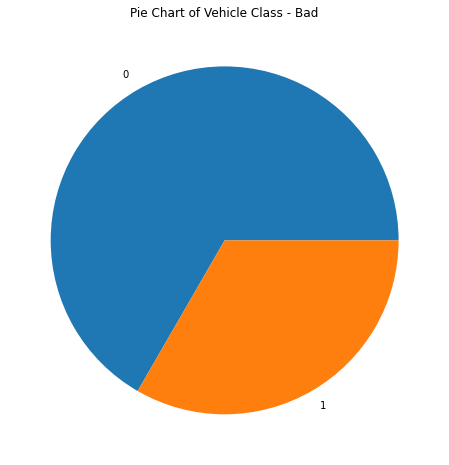

In [119]:
returnable_df.Import.value_counts().plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Pie Chart of Vehicle Class - Bad")
plt.ylabel("")
plt.show()

([<matplotlib.patches.Wedge at 0x7fd613d11250>,
 [Text(-0.5500000594609754, 0.95262790983307, ''),
  Text(0.5500001486524351, -0.9526278583383437, '')])

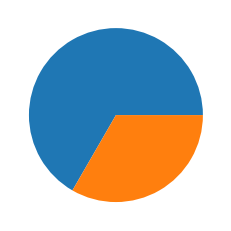

In [108]:
plt.pie(returnable_df.Import.value_counts())

<BarContainer object of 30 artists>

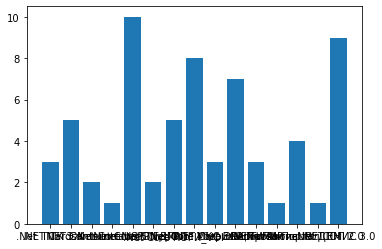

In [111]:
plt.bar(returnable_df['Наименование компонента'], returnable_df['Доля в проекте'])

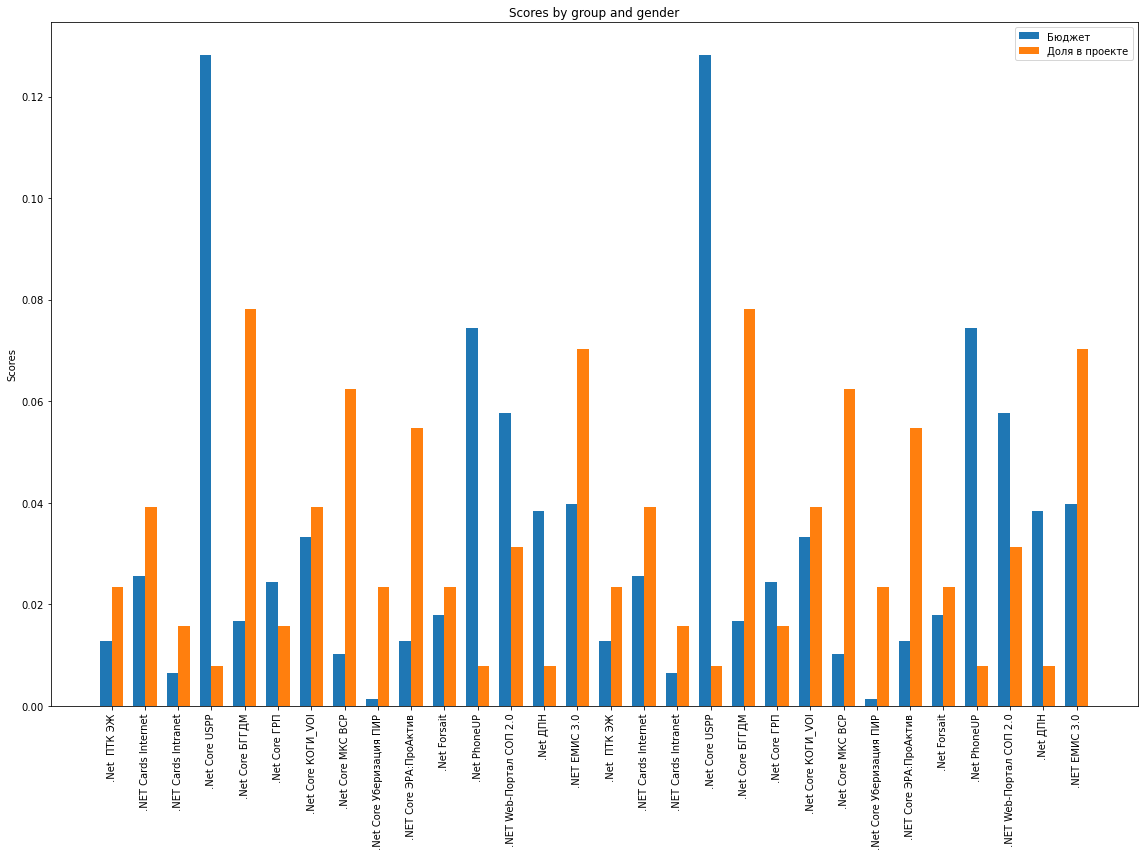

In [147]:
labels = returnable_df['Наименование компонента'].values
x1 = returnable_df['Бюджет']/returnable_df['Бюджет'].sum()
x2 = returnable_df['Доля в проекте']/returnable_df['Доля в проекте'].sum()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 12))
rects1 = ax.bar(x - width/2, x1, width, label='Бюджет')
rects2 = ax.bar(x + width/2, x2, width, label='Доля в проекте')

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation=90)
fig.tight_layout()
fig.savefig('Testfig.png')
plt.show()


In [144]:
x = returnable_df['Бюджет']/returnable_df['Бюджет'].sum()
y = returnable_df['Доля в проекте']/returnable_df['Доля в проекте'].sum()


plt.bar([x, y], label=['x', 'y'])
plt.legend(loc='upper right')

TypeError: bar() missing 1 required positional argument: 'height'

([<matplotlib.patches.Wedge at 0x7fd6148bdfa0>,
 [Text(0.11498130276606913, 1.0939740856227893, ''),
  Text(-0.7360436312779135, -0.8174593401847111, ''),
  Text(0.7360437460820064, -0.817459236814636, ''),
  Text(1.0759623904280886, -0.2287027205441018, '')])

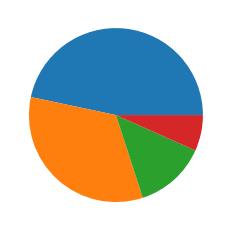

In [116]:
plt.pie(returnable_df['Платформа'].value_counts())

4